## Import required libraries

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("./creditcard_2023.csv")

## Descriptive statistics

- *id*: Unique identifier for each transaction
- *V1-V28*: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
- *Amount*: The transaction amount
- *Class*: Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [6]:
df.shape

(568630, 31)

In [7]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.798003e-17,-1.351534e-16,-3.518788e-17,-4.158567e-17,5.917961e-17,-3.958636e-17,-4.758361e-17,1.499483e-18,3.998623e-17,...,8.397107e-18,-1.247070e-17,3.108304e-18,-1.519477e-17,-2.404172e-17,-7.547400e-18,-3.598760e-17,2.549122e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


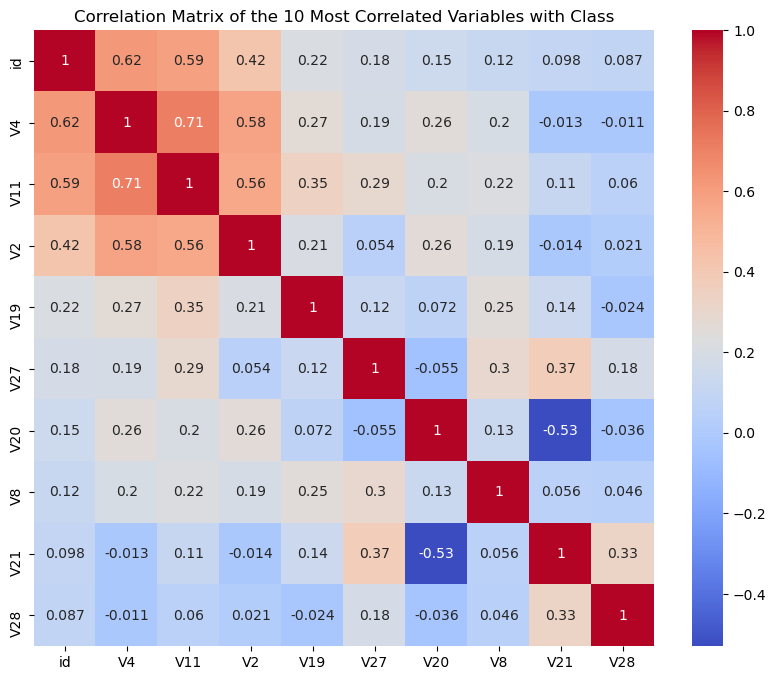

In [20]:
correlation_matrix = df.corr()
top_correlations = correlation_matrix['Class'].sort_values(ascending=False)[1:11]
top_corr_matrix = df[top_correlations.index].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of the 10 Most Correlated Variables with Class")
plt.show()


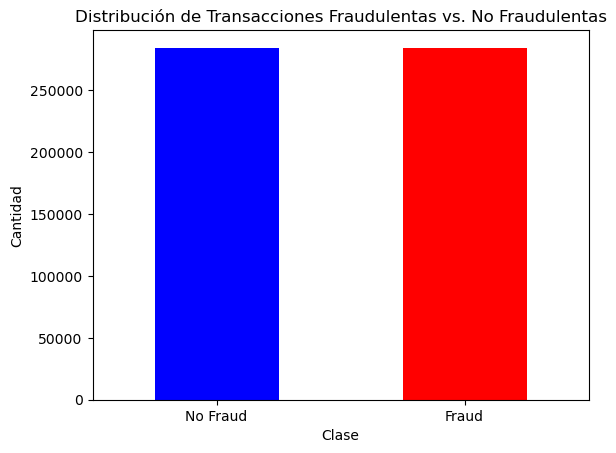

In [12]:
fraud_counts = df['Class'].value_counts()
fraud_counts.plot(kind='bar', color=['blue', 'red'])
plt.xticks([0, 1], ['No Fraud', 'Fraud'], rotation=0)
plt.xlabel('Class')
plt.ylabel('Quantity')
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.show()

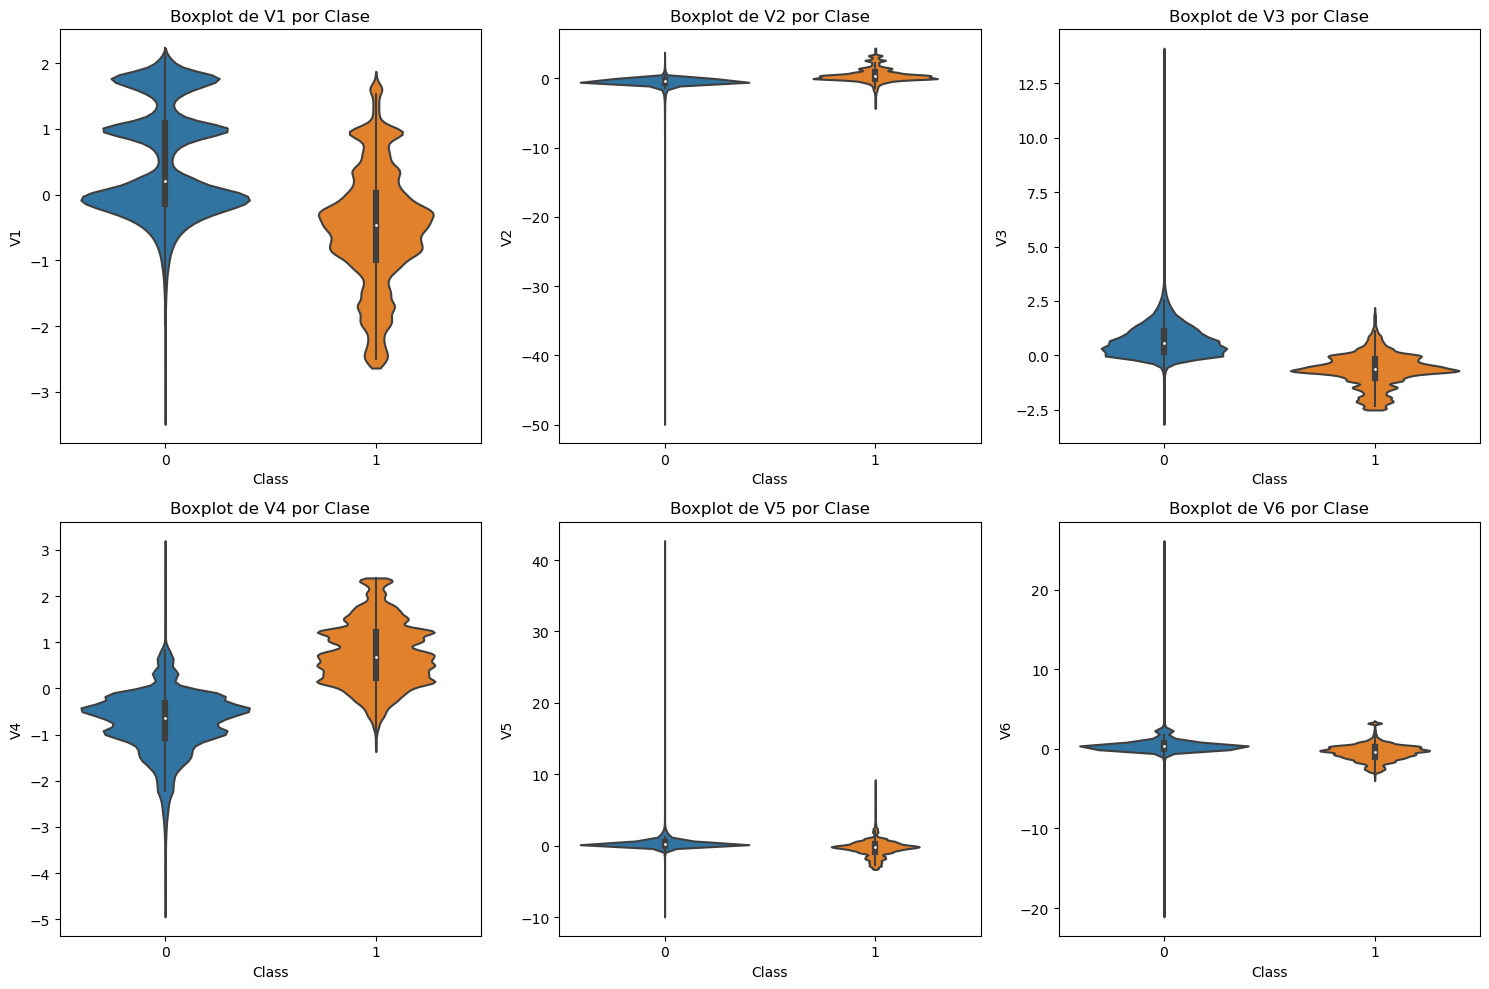

In [24]:
selected_cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', ]

n_rows = 2
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

axes = axes.ravel()

for i, col in enumerate(selected_cols):
    sns.violinplot(x='Class', y=col, data=df, ax=axes[i], cut=0)
    axes[i].set_title(f'Boxplot de {col} por Clase')
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


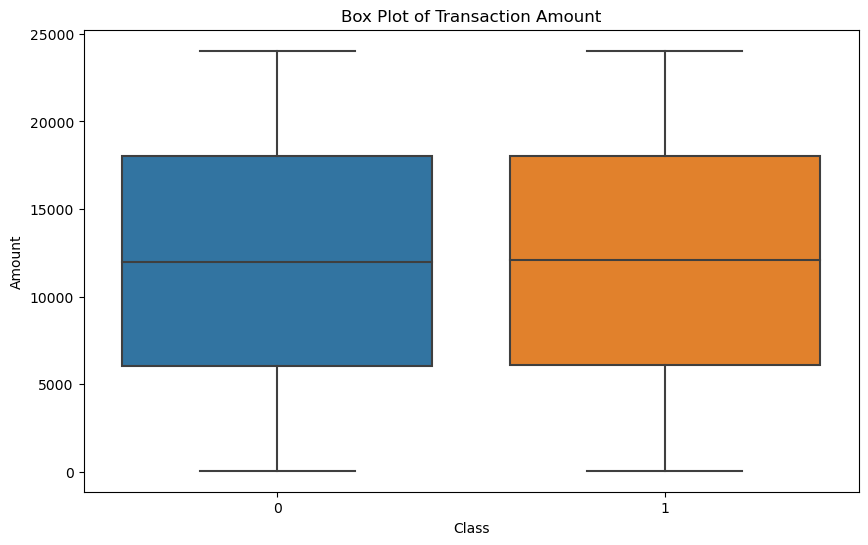

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.xlabel('Class')
plt.ylabel('Amount')
plt.title('Box Plot of Transaction Amount')
plt.show()